In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [24]:
checkpoints = '/Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task.keras'

In [10]:
train_dir = r'/Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task/train'
validation_dir = r'/Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task/validation'
test_dir = r'/Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task/test'

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])



In [14]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1040 images belonging to 4 classes.
Found 186 images belonging to 4 classes.


In [25]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [26]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 40,
                         callbacks = callbacks)

Epoch 1/40


/Users/shayannoor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - acc: 0.4567 - loss: 1.1916 
Epoch 1: val_loss improved from inf to 0.89176, saving model to /Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 734ms/step - acc: 0.4599 - loss: 1.1882 - val_acc: 0.6313 - val_loss: 0.8918
Epoch 2/40
 1/32 ━━━━━━━━━━━━━━━━━━━━ 21s 706ms/step - acc: 0.5625 - loss: 1.0180

/Users/shayannoor/anaconda3/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.89176
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.5625 - loss: 1.0180 - val_acc: 0.4750 - val_loss: 1.2099
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - acc: 0.7374 - loss: 0.6822 
Epoch 3: val_loss improved from 0.89176 to 0.56050, saving model to /Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 769ms/step - acc: 0.7382 - loss: 0.6799 - val_acc: 0.7688 - val_loss: 0.5605
Epoch 4/40
 1/32 ━━━━━━━━━━━━━━━━━━━━ 24s 780ms/step - acc: 0.8125 - loss: 0.4169
Epoch 4: val_loss improved from 0.56050 to 0.55348, saving model to /Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - acc: 0.8125 - loss: 0.4169 - val_acc: 0.7750 - val_loss: 0.5535
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - acc: 0.8171 - loss: 0.4378 
Epoch 5: val_loss did not improve from 0.55348
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 786ms/st

In [27]:
model_history.history

{'acc': [0.5634920597076416,
  0.5625,
  0.7638888955116272,
  0.8125,
  0.8313491940498352,
  0.78125,
  0.8601190447807312,
  0.84375,
  0.879960298538208,
  0.9375,
  0.891865074634552,
  0.9375,
  0.9077380895614624,
  0.875,
  0.9196428656578064,
  0.875,
  0.9126983880996704,
  0.84375,
  0.9384920597076416,
  0.96875,
  0.932539701461792,
  0.90625,
  0.9384920597076416,
  0.90625,
  0.9414682388305664,
  0.9375,
  0.95932537317276,
  0.9375,
  0.9583333134651184,
  0.9375,
  0.9580078125,
  0.875,
  0.9533730149269104,
  0.96875,
  0.9672619104385376,
  1.0,
  0.9642857313156128,
  0.875,
  0.9623016119003296,
  0.96875],
 'loss': [1.0783443450927734,
  1.0179768800735474,
  0.6089288592338562,
  0.4168592393398285,
  0.4212134778499603,
  0.497334361076355,
  0.36865848302841187,
  0.3571350872516632,
  0.2770080864429474,
  0.26811477541923523,
  0.2697313725948334,
  0.2608978748321533,
  0.22260241210460663,
  0.20050375163555145,
  0.19278687238693237,
  0.3381831049919128

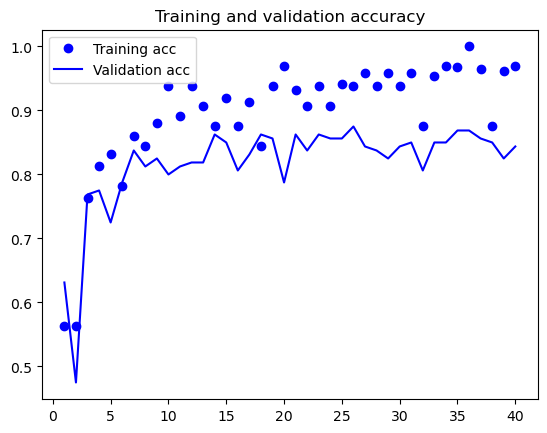

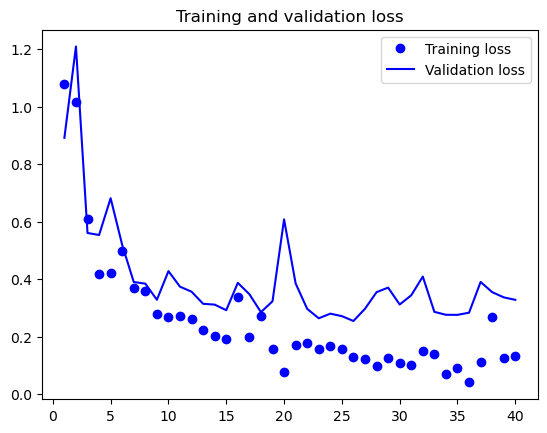

<Figure size 640x480 with 0 Axes>

In [28]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

Found 120 images belonging to 4 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


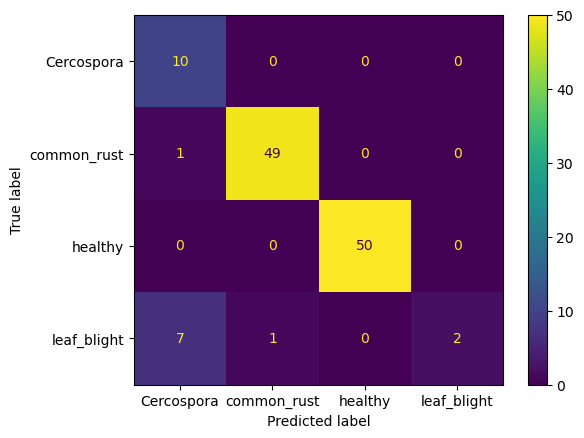

In [35]:
model = load_model(r'/Users/shayannoor/Desktop/ml_code/ML Lab Spring 25/Computer vision\lab_task.keras')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [36]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.56      1.00      0.71        10
 common_rust       0.98      0.98      0.98        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       1.00      0.20      0.33        10

    accuracy                           0.93       120
   macro avg       0.88      0.80      0.76       120
weighted avg       0.95      0.93      0.91       120

